In [11]:
using Plots
using LinearAlgebra

In [12]:
function golden_section(f, a, b, eps=0.01)
    Fi = (1+5^0.5)/2
    while true
        x1 = b-(b-a)/Fi 
        x2 = a+(b-a)/Fi 
        y1 = f(x1)
        y2 = f(x2)
        if y1 >= y2
            a = x1
        else
            b = x2
        end
        if abs(b-a) < eps
            return (a+b)/2
        end
    end
end
function norm(a)
    su = 0 
    for i ∈ a
        su += i^2
    end
    return su^(1/2)
end
function dfdx(f, x,y, h)
    return (f(x+h,y)-f(x-h,y))/(2*h)
end
function dfdy(f, x,y, h)
    return (f(x,y+h)-f(x,y-h))/(2*h)
end
function evclid(a, b)
    return sum(a .* b)
end

evclid (generic function with 1 method)

In [13]:
function DFP(f,start, eps, h)
    function nk_f(x, g)
        return (a) -> f((x-a*g)...)
    end
    x_i = copy(start)
    hist = [copy(start)]
    pred_grad = [0.0, 0.0]
    pred_x = [0, 0]
    nu = I(length(start))
    first = true
    while true
        grad = [dfdx(f, x_i..., h), dfdy(f, x_i..., h)]

        if !first
            d_x = x_i - pred_x
            d_g = grad-pred_grad
            nu = nu+(d_x*d_x')/dot(d_x, d_g)-nu*(d_g*d_g')*nu'/dot(d_g, nu*d_g)
            p = nu*grad
        else
            p = nu*grad
            first = false
        end
        alpha = golden_section(nk_f(x_i, p), 0, 20, 0.0000001)
        x_i1 = x_i-alpha*p
        pred_x = copy(x_i)
        x_i = x_i1
        push!(hist, copy(x_i))
        pred_grad = copy(grad)
        if norm([dfdx(f, x_i..., h), dfdy(f, x_i..., h)]) < eps
            return x_i, hist
        end
    end
end

DFP (generic function with 1 method)

In [14]:
function BFGS(f,start, eps, h)
    function nk_f(x, g)
        return (a) -> f((x-a*g)...)
    end
    x_i = copy(start)
    hist = [copy(start)]
    pred_grad = [0.0, 0.0]
    pred_p = [0, 0]
    pred_x = [0, 0]
    nu = I(length(start))
    first = true
    while true
        println("=========inter==========")
        println("x = ", x_i)
        grad = [dfdx(f, x_i..., h), dfdy(f, x_i..., h)]
        println("grad = ", grad)

        if !first
            d_x = x_i - pred_x
            println("d_x = ", d_x)
            d_g = grad-pred_grad
            println("d_g = ", d_g)
            pho = 1/dot(d_g, d_x)
            println("rho = ", pho)
            nu = (I(length(start)) - pho*(d_x*d_g'))*nu*(I(length(start)) - pho*(d_g*d_x')) + pho*(d_x*d_x')
            println("nu = ", nu)
            p = nu*grad
        else
            p = nu*grad
            first = false
        end
        println("p = ", p)
        alpha = golden_section(nk_f(x_i, p), 0, 20, 0.0000001)
        println("alpha = ", alpha)
        x_i1 = x_i-alpha*p
        println("new x = ", x_i1)
        pred_x = copy(x_i)
        x_i = x_i1
        push!(hist, copy(x_i))
        pred_p = copy(p)
        pred_grad = copy(grad)
        println("grad norm = ", norm([dfdx(f, x_i..., h), dfdy(f, x_i..., h)]))
        if norm([dfdx(f, x_i..., h), dfdy(f, x_i..., h)]) < eps
            return x_i, hist
        end
    end
end

BFGS (generic function with 1 method)

In [15]:
f(x, y) = (x-4*y)^2+(y+5)^2

f (generic function with 1 method)

3
[-20.000002301937467, -4.999989837669568]


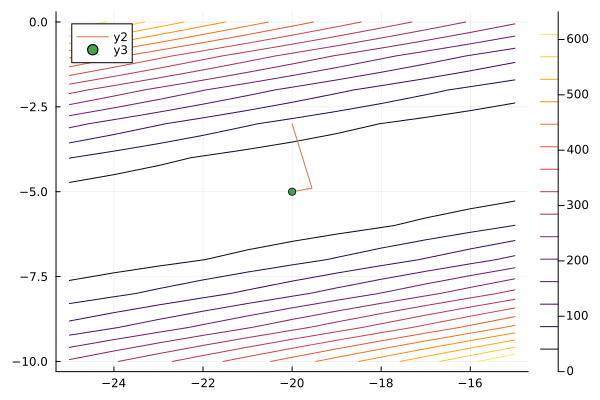

In [16]:
x_min, hist = DFP(f, [-20.0, -3], 0.001, 0.00001)
contour(-25:1:-15, -10:1:0, f)
println(length(hist))
println(x_min)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])

=========inter==========
x = [-20.0, -3.0]
grad = [-15.999999999394275, 68.00000000026785]
p = [-15.999999999394275, 68.00000000026785]
alpha = 0.027864078639764655
new x = [-19.554174741780642, -4.89475734751146]
grad norm = 0.051055781594476206
=========inter==========
x = [-19.554174741780642, -4.89475734751146]
grad = [0.04970929652851202, 0.011648118855133586]
d_x = [0.44582525821935803, -1.8947573475114599]
d_g = [16.04970929592279, -67.98835188141271]
rho = 0.00735419598271547
nu = [0.9486768408742049 0.2173925657054612; 0.2173925657054612 0.07918775321351468]
p = [0.04969027283630752, 0.011728819873048808]
alpha = 8.972129447223725
new x = [-20.000002301935858, -4.999989837675624]
grad norm = 0.00037393524232485955
3
[-20.000002301935858, -4.999989837675624]


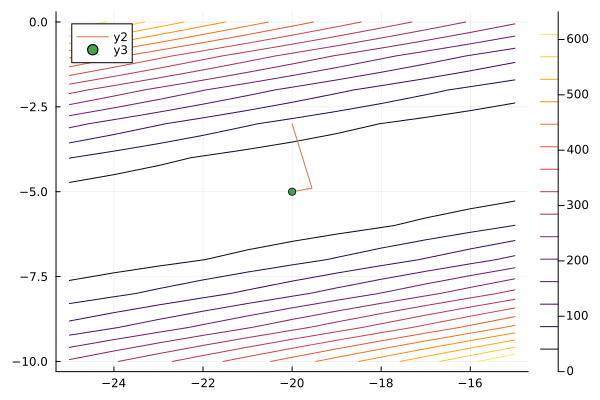

In [17]:
x_min, hist = BFGS(f, [-20.0, -3], 0.001, 0.00001)
contour(-25:1:-15, -10:1:0, f)
println(length(hist))
println(x_min)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])


In [18]:
((I(2)-224.8909*[0.0110 -0.0354; 0.0020 -0.0065])*[0.9486 0.2174; 0.2174 0.0791]*(I(2)-224.8909*[0.0110 -0.0354; 0.0020 -0.0065]')+224.8909*[0.0206 0.0038; 0.0038 0.0007])*[-0.0062, 0.171]

2-element Vector{Float64}:
 0.20980817306559982
 0.05029084772129486